In [10]:
import pandas as pd
import numpy as np
import string, re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('spam_detection.csv', encoding='latin1')[['v1','v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [14]:
df.dropna(inplace=True)
print(df.shape)
df.head()

(5572, 2)


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df['clean_message'] = df['message'].apply(clean_text)
df.head()

,label,message,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_message'], df['label'], test_size=0.2, random_state=42)

In [25]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)

In [27]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec, y_train)
y_pred_log = lr.predict(X_test_vec)

In [33]:
svm = LinearSVC()
svm.fit(X_train_vec, y_train)
y_pred_svm = svm.predict(X_test_vec)

E:\Anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



Logistic Regression Results:
Accuracy: 0.9552
Precision: 0.9808
Recall: 0.6800
F1 Score: 0.8031

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.98      0.68      0.80       150

    accuracy                           0.96      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



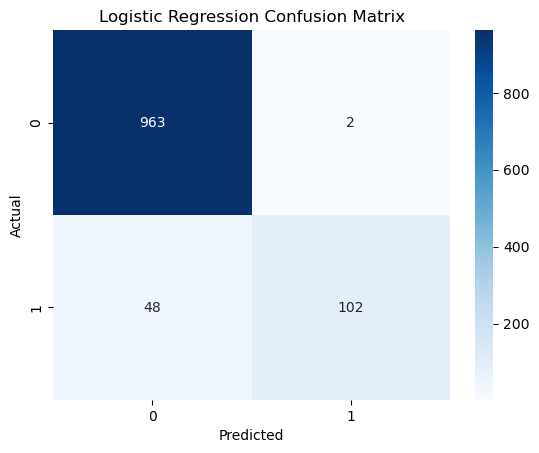


Linear SVM Results:
Accuracy: 0.9776
Precision: 0.9630
Recall: 0.8667
F1 Score: 0.9123

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.87      0.91       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



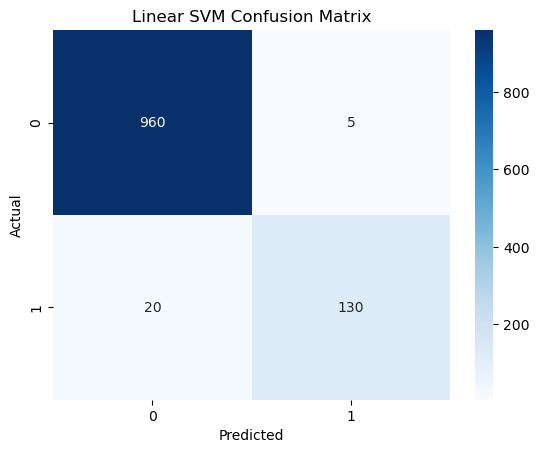

In [35]:
models = {'Logistic Regression': lr, 'Linear SVM': svm}

for name, model in models.items():
    y_pred = model.predict(X_test_vec)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [37]:
sample = ["Congratulations! You won a free ticket.",
          "Are we meeting for lunch tomorrow?"]
# Transform using the same vectorizer
sample_vec = tfidf_vectorizer.transform(sample)

# Predict
print("Predictions (1 = spam, 0 = ham):", lr.predict(sample_vec))


Predictions (1 = spam, 0 = ham): [1 0]
